In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
from scipy import signal

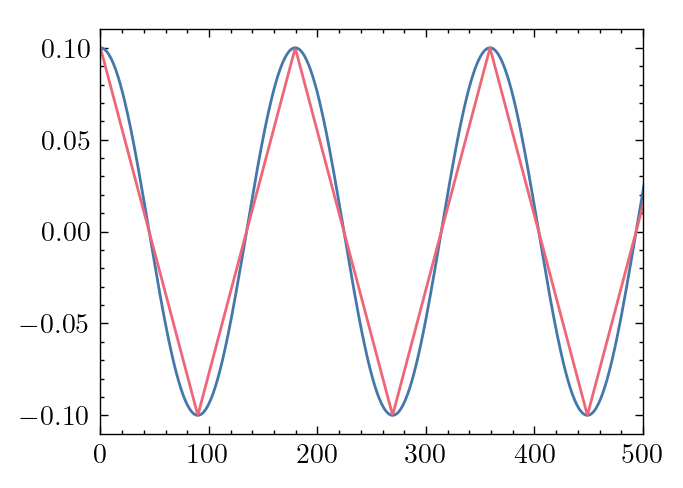

In [2]:
amplitude   = 0.1
freq        = 3.5
time_step   = 1e-10
N_periods   = 50
N_voltages  = int(N_periods*np.pi/(freq*1e8*time_step))
time_steps  = time_step*np.arange(N_voltages)
x_vals      = amplitude*np.cos(freq*time_steps*1e8)
y_target    = amplitude*signal.sawtooth(freq*time_steps*1e8-np.pi, 0.5)
y           = (y_target - np.mean(y_target))/np.std(y_target)

with plt.style.context(["science","bright"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()
    ax.plot(x_vals)
    ax.plot(y_target)
    ax.set_xlim(0,500)

In [135]:
folder  = "../data/sine_to_triangle/"
N_max   = 23
N_vals  = N_max-1
data    = pd.DataFrame([np.loadtxt(f"{folder}ypred_{i}.csv") for i in range(1,N_max)]).T
data    = data.replace(0, np.nan).dropna(ignore_index=True)
data

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-1.200696,-2.416841,-1.899294,2.553876,1.466620,0.363336,0.770614,-0.394313,-0.079245,0.254879,...,1.168791,1.221928,-0.327247,-0.416265,-0.196749,1.175849,0.521457,-0.188974,1.176335,2.925334
1,-1.345368,-2.342770,-1.360704,2.520291,1.592421,0.666151,0.784980,-0.266117,-0.174726,0.287390,...,1.253923,1.219735,-0.132133,-0.433581,-0.216581,1.098064,0.541767,-0.161905,1.006032,2.668512
2,-1.377759,-2.280162,-0.876987,2.348303,1.560642,0.480135,0.804178,-0.262018,-0.185496,0.263919,...,1.164254,1.025298,-0.182945,-0.479491,-0.273350,0.976374,0.417646,-0.233327,0.922207,2.331914
3,-1.384611,-2.191415,-0.590269,2.272974,1.625178,0.595400,0.791704,-0.359887,-0.106947,0.272326,...,1.173189,1.046297,-0.200659,-0.457900,-0.290039,0.902883,0.225019,-0.223015,0.820821,2.194086
4,-1.382901,-2.047154,-0.438539,2.175811,1.537685,0.371387,0.672122,-0.284012,-0.144912,0.210842,...,1.091527,0.953373,-0.247531,-0.472995,-0.294984,0.808356,0.127541,-0.185177,0.658080,1.985470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,1.291432,1.308072,1.376961,1.023273,1.440901,1.240868,1.052877,1.351378,1.159723,1.161742,...,1.230355,1.322169,1.496427,1.436169,1.118528,1.142288,1.135506,0.949153,1.111954,1.098669
3988,1.201604,1.222017,1.318742,1.098668,1.256228,1.221577,1.288792,1.202556,1.149773,1.120792,...,1.131279,1.331806,1.503843,1.444774,0.974670,1.136930,1.035424,0.929069,1.080304,1.087187
3989,1.134483,1.210935,1.228732,1.009336,1.266834,1.044861,1.003847,1.199597,1.063840,1.170606,...,1.107718,1.453815,1.427540,1.277398,1.083077,1.138457,0.990774,0.860366,1.001043,1.049733
3990,1.129673,1.110826,1.245516,1.063787,1.400767,1.191105,1.112386,1.127085,1.171850,1.122779,...,1.074094,1.288724,1.310907,1.253649,0.976246,1.076461,1.068383,0.992439,0.909330,0.937849


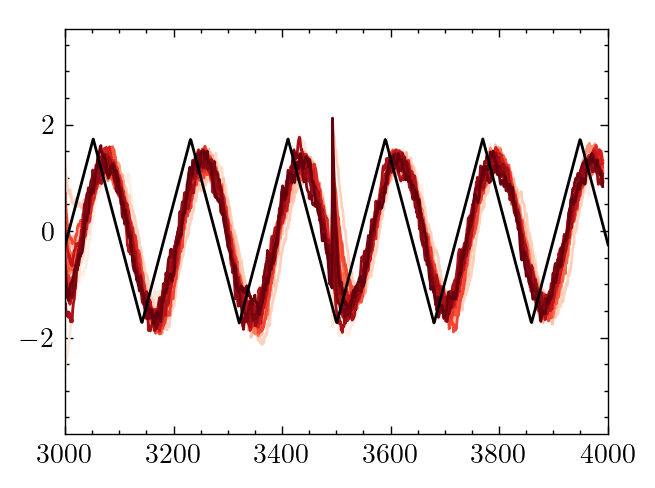

In [136]:
c_map = plt.get_cmap('Reds')

with plt.style.context(["science","bright"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()
    for i, col in enumerate(data.columns):
        ax.plot(data[col], c=c_map((i+1)/N_vals))

    ax.plot(y, c='black')
    ax.set_xlim(3000,4000)